# **Crop Disease EDA**

## **Overview of Dataset Diseases**

# Disease Reference

## 1. Tomato Target Spot  
**Pathogen:** *Corynespora cassiicola*  
**Symptoms:** Small brown or tan necrotic spots with darker “rings” (concentric pattern). Leaves may yellow, collapse, or drop.  
**Key notes:** Spots often start on older leaves and spread upward; under humid, wet conditions, progression is fast.  
<p align="center"><img src="https://apps.lucidcentral.org/pppw_v10/images/entities/tomato_target_spot_163/thumbs/img_4795_sml.jpg" alt="Tomato Target Spot" height="300" width="300"/></p>

---

## 2. Tomato Mosaic Virus (ToMV)  
**Pathogen:** *Tobamovirus* (virus)  
**Symptoms:** Mottled (“mosaic”) pattern of light and dark green, leaf deformation, sometimes stunting.  
**Transmission:** Mechanical (tools, hands, infected debris).  
<p align="center"><img src="https://blogs.ifas.ufl.edu/stlucieco/files/2023/03/4-22-768x576.png" alt="Tomato Mosaic Virus" height="300" width="300"/></p>
---

## 3. Tomato Yellow Leaf Curl Virus (TYLCV)  
**Pathogen:** *Begomovirus*  
**Symptoms:** Upward curling of leaves, yellowing (interveinal chlorosis), stunted growth.  
**Vector:** Whiteflies (*Bemisia tabaci*).  
<p align="center"><img src="https://agriculture.vic.gov.au/biosecurity/plant-diseases/vegetable-diseases/tomato-yellow-leaf-curl-virus/IU-TYLCV_img_1.jpg" alt="Tomato Yellow Leaf Curl Virus (TYLCV)" height="300" width="300"/></p>
---

## 4. Tomato Bacterial Spot  
**Pathogen:** *Xanthomonas campestris* pv. *vesicatoria*  
**Symptoms:** Water-soaked, dark, scabby spots on leaves, stems, and fruits; sometimes a “shot-hole” look.  
**Spread:** Splashing water, rain, tools, seeds, transplants.  
<p align="center"><img src="https://ag.purdue.edu/department/arge/swpap/_media/bacterial-spot-of-tomato-1-original.jpg" width="300"/></p>

---

## 5. Tomato Early Blight  
**Pathogen:** *Alternaria solani* (fungus)  
**Symptoms:** Dark lesions often with concentric rings (“bull’s-eye”), yellowing around spots, can appear on leaves, stems, fruits.  
**Favorable conditions:** Warm and wet or humid.  
<p align="center"><img src="https://plantpath.ifas.ufl.edu/u-scout/tomato/images/early-blight/22161DD2C3964DF39A98F053EB87FBF3/1-36.png" width="300"/></p>

---

## 6. Tomato (Healthy)  
**Description:** No disease symptoms. Uniform green leaves, no spots, no discoloration, no deformation.  
<p align="center"><img src="https://media.istockphoto.com/id/450481469/photo/natural-tomato-greenhouse.jpg?s=2048x2048&w=is&k=20&c=82QFmzsoDWTyt84CAE8cInwXFx5bGq7IgljF-MNbCk0=" alt="Healthy Tomato" height="300" width="300"/></p>
---

## 7. Tomato Late Blight  
**Pathogen:** *Phytophthora infestans* (an oomycete)  
**Symptoms:** Large, rapidly spreading dark patches; often white fuzzy growth on leaf undersides (sporangia), rapid tissue death.  
**Severity:** Very aggressive under cool wet weather.  
<p align="center"><img src="https://vegpath.plantpath.wisc.edu/wp-content/uploads/sites/210/2021/02/tomato-blight-leaf-lesions-1024x805.png" alt="Tomato Late Blight" height="300" width="300"/></p>
---

## 8. Tomato Leaf Mold  
**Pathogen:** *Passalora fulva* (a fungus)  
**Symptoms:** Yellow patches on upper leaf surfaces; olive-green fuzzy fungal growth (mold) on **underside** of leaves.  
**Environment:** High humidity, low light, poor ventilation (e.g. in greenhouses).  
<p align="center"><img src="https://extension.umn.edu/sites/extension.umn.edu/files/styles/caption_medium/public/tomato-leaf-mold.jpg?itok=uvEhJlKM" alt="Tomato Leaf Mold" height="300" width="300"/></p>
---

## 9. Tomato Septoria Leaf Spot  
**Pathogen:** *Septoria lycopersici* (fungus)  
**Symptoms:** Small circular spots (~1–5 mm) with dark margins and light centers, often with tiny black fruiting bodies (pycnidia). Primarily affects lower leaves first.  
**Progression:** Spots may coalesce; leaves turn yellow and drop.  
<p align="center"><img src="https://www.missouribotanicalgarden.org/Portals/0/Gardening/Gardening%20Help/images/Pests/Septoria_Leaf_Spot_of_Tomato186.jpg" alt="Septoria Leaf Spot" width="300"/></p>

---

## 10. Tomato Spider Mites / Two-Spotted Spider Mite  
**Organism:** *Tetranychus urticae* (arachnid, pest)  
**Symptoms:** Tiny speckling (chlorotic or whitish dots) on leaves, especially on upper surfaces; fine webbing, leaf bronzing, leaf drop under heavy pressure.  
**Conditions:** Hot, dry weather favors outbreak. 
<p align="center"><img src="https://growtomatoeseasily.com/wp-content/uploads/2022/12/spidermites.jpg" alt="Tomato Spider Mites" height="300" width="300"/></p> 

## All the Imports

In [32]:
import numpy as np
import pandas as pd
import os
from PIL import Image, ImageOps
from check_image_prop import CheckImgProp
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
# used for img augmentation
import albumentations as A
import math

## Using Self-made CheckImgProp Class

In [4]:
curr_dir = os.getcwd()
curr_dir

'/home/root123/GitHub/Two_Months_ML_Journey/Week 4'

In [5]:
destination_dir = 'data/PlantVillage'

In [6]:
img = CheckImgProp(curr_dir=curr_dir, destination_dir=destination_dir, img_size=(256,256), img_format='RGB', healthy_class='healthy')

### *Checking and formatting size*

In [7]:
img.check_size()

### *Checking and changing format to 'RGB'*

In [8]:
img.change_format()

### *Checking class distribution*

In [9]:
class_dist_df = pd.DataFrame()
class_dist_df= img.class_dist()

In [10]:
class_dist_df.head()

,veg_name,disease_classes,healthy_classes,disease_files,healthy_files,total_files
0,Tomato,9,1,14420,1591,16011
1,Pepper,1,1,997,1478,2475
2,Potato,2,1,2000,152,2152


In [11]:
# Result: The data is imbalanced for Tomato and Potato class

## Checking RGB Composition and Contrast (Brightness/Darkness)

In [12]:
# checking the channel composition of the images
# using only the pepper folder for an estimate
pepper_path = ['Pepper/Pepper__bell___healthy', 'Pepper/Pepper__bell___Bacterial_spot']
mean_per_channel = [0.0, 0.0, 0.0]
grayScale_val = []
counter = 0
for cls in pepper_path:
    in_path = Path(curr_dir)/destination_dir/cls
    for file in os.listdir(in_path):
        if file.lower().endswith(('.jpg', '.png')):
            with Image.open(in_path/file) as image:
                # respect EXIF orientation; then work on the transposed image
                img = ImageOps.exif_transpose(image)
                counter += 1
                img_array_rgb = np.asarray(img)
                # convert to grayScale
                img_gray = img.convert('L')
                img_array_gray = np.asarray(img_gray).astype('float32')
                grayScale_val.append(img_array_gray.mean())
                mean_per_channel += img_array_rgb.mean(axis = (0,1))

mean_per_channel /= counter
print("Average per channel:")
print(f"Red:   {mean_per_channel[0]:.2f}")
print(f"Green: {mean_per_channel[1]:.2f}")
print(f"Blue:  {mean_per_channel[2]:.2f}\n")
print(f"GrayScale values:{grayScale_val}")
print(f"GrayScale values mean:{sum(grayScale_val)/counter}")

Average per channel:
Red:   120.90
Green: 129.80
Blue:  107.61

GrayScale values:[np.float32(135.35376), np.float32(130.68765), np.float32(181.76147), np.float32(130.70444), np.float32(130.3841), np.float32(117.69461), np.float32(153.01778), np.float32(122.756485), np.float32(110.096146), np.float32(160.89594), np.float32(119.8994), np.float32(124.76912), np.float32(131.78499), np.float32(122.12387), np.float32(108.81987), np.float32(104.75119), np.float32(113.975815), np.float32(147.9673), np.float32(143.19632), np.float32(124.775055), np.float32(113.018936), np.float32(150.16231), np.float32(132.33391), np.float32(128.90395), np.float32(119.200485), np.float32(123.94777), np.float32(172.40125), np.float32(133.56155), np.float32(116.26677), np.float32(132.55614), np.float32(125.16513), np.float32(120.45276), np.float32(124.12959), np.float32(111.55083), np.float32(140.32433), np.float32(117.15372), np.float32(122.86383), np.float32(130.84537), np.float32(143.80226), np.float32(125.313

## Plotting Pixel Intensity (GrayScale distribution)

/tmp/ipykernel_1471/3211469656.py:3: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  histogram.legend().set_title('Pixel Intensity Histogram')


Text(0, 0.5, 'No. of Images')

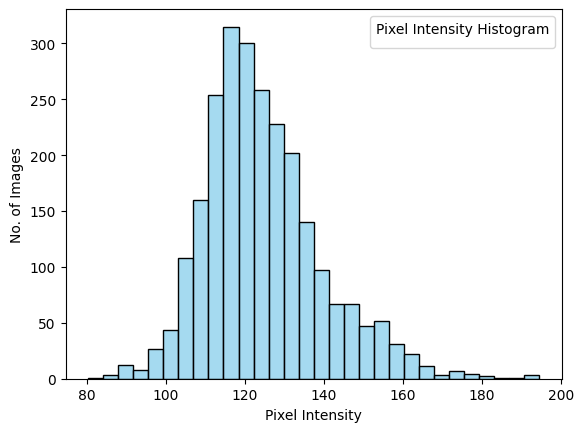

In [13]:
grayScale_val_arr = np.array(grayScale_val)
histogram = sns.histplot(grayScale_val_arr, bins=30, color='skyblue', edgecolor='black')
histogram.legend().set_title('Pixel Intensity Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('No. of Images')

## Tackling Data Imbalance Issue

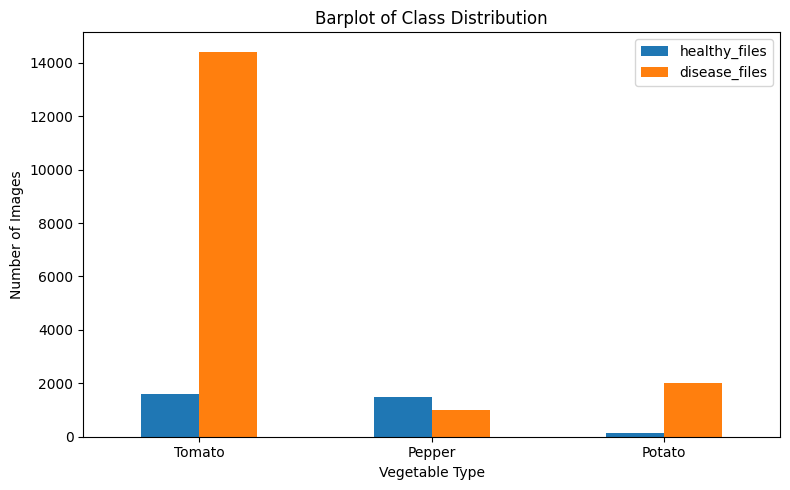

In [14]:
# Plotting the current imbalance
class_dist_df.plot(
    kind='bar',
    x='veg_name',
    y=['healthy_files', 'disease_files'],
    figsize=(8,5),
    title='Barplot of Class Distribution',
)
plt.xlabel('Vegetable Type')
plt.ylabel('Number of Images')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [ ]:
# test image for augmentation
# test_img = Image.open(f'{curr_dir}/test_data/test_img.JPG')
# test_img.size

(256, 256)

In [19]:
# define tranformation
transform = A.Compose([
        
        # GEOMETRIC TRANSFORMATION
        # p=0.5, rotate images randomly 50% of the time
        #leaves can appear mirrored
        A.RandomRotate90(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.VerticalFlip(p=0.3),
        A.ShiftScaleRotate(
                            shift_limit=0.05, # image can move +-5% of original width/height in any direction 
                            scale_limit=0.1, # random scaling between 90% (zoom-out) and 110%(zoom-in)
                            rotate_limit=30, # rotation limit: -30 to +30
                            p=0.7 # applied 70% of times
                        ),
        # COLOR AND LIGHTING 
        A.RandomBrightnessContrast(
                            brightness_limit=0.2, # change +-20% brightness of the original 
                            contrast_limit=0.2, # same as brightness but for contrast
                            p=0.6),
        A.HueSaturationValue(
                            hue_shift_limit=10, # change hue angle by +-10 degrees
                            sat_shift_limit=15, # change saturation val by +-15 units
                            val_shift_limit=10, # change brightness val by +-10 units
                            p=0.5),
        # Contrast Limited Adaptive Histogram Equalization
        # Enhances local contrast by equalizing brightness in small regions.
        # Useful for images where lighting is uneven.
        A.CLAHE(clip_limit=4.0, p=0.3),  # 'clip_limit' controls how strong equalization is. Stronger val can introduce visible noise
        
        # NOISE AND BLUR
        # blur_limit (3,5): Either 3x3 or 5x5 kernel selection at random
        # kernel: A small window of pixel i.e., say 3x3 matrix sliding through the image. Combines those pixels to get a new one
        A.GaussianBlur(blur_limit=(3,5), p=0.3),
        
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.3), # var limit is the range of variance that aids select random noise values
        
        # SPATIAL RANDOMNESS
        A.RandomSizedCrop(
                            min_max_height=(256,256),
                            size=(256,256),
                            # scale=(0.8,1.0) # random crop area between 80% to 100%
                            # ratio=(0.9,1.1) # control aspect ratio (w/h). 0.9: h greater than 2, 1.1: w greater than h
                            p=0.5), 

        A.PadIfNeeded(min_height=256, min_width=256, p=1),  
    ])

/home/root123/.local/lib/python3.10/site-packages/albumentations/core/validation.py:114: UserWarning: ShiftScaleRotate is a special case of Affine transform. Please use Affine transform instead.
  original_init(self, **validated_kwargs)
/tmp/ipykernel_1471/4164632610.py:36: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  A.GaussNoise(var_limit=(10.0, 50.0), p=0.3), # var limit is the range of variance that aids select random noise values


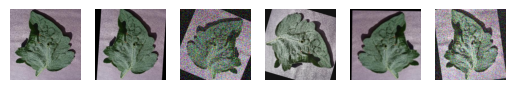

In [ ]:
# checking test images
# img_list = [test_img]
# test_img_arr = np.array(test_img)
# for i in range(5):
#     augmentations = transform(image=test_img_arr)
#     augmented_img = augmentations['image']
#     img_list.append(augmented_img)

# for i, img in enumerate(img_list):
#     plt.subplot(1, len(img_list), i+1)
#     plt.imshow(img)
#     plt.axis('off')
# plt.show()


In [27]:
class_dist_df.head()

,veg_name,disease_classes,healthy_classes,disease_files,healthy_files,total_files
0,Tomato,9,1,14420,1591,16011
1,Pepper,1,1,997,1478,2475
2,Potato,2,1,2000,152,2152


In [ ]:
img_paths = [Path(curr_dir)/destination_dir/'Potato/Potato_train', 
             Path(curr_dir)/destination_dir/'Tomato/Tomato_train']

In [ ]:
# keeping healthy files 90% of disease files
healthy_file_amount = [
    abs((0.9 * class_dist_df['disease_files'][2]) - class_dist_df['healthy_files'][2]), # potato
    abs((0.9 * class_dist_df['disease_files'][0]) - class_dist_df['healthy_files'][0]), # tomato
]

print(healthy_file_amount)

[np.float64(1648.0), np.float64(11387.0)]


In [33]:
# augment per original image
aug_per_img = [
    math.floor(healthy_file_amount[0]/class_dist_df['healthy_files'][2]), # potato
    math.floor(healthy_file_amount[1]/class_dist_df['healthy_files'][0]), # tomato
]

aug_per_img

[10, 7]

In [ ]:
def augment_images(img_paths, aug_per_img = [1,1], num_ori_img = [-1,-1]):   
    for curr_veg, img_path in enumerate(img_paths):
        for counter, image in enumerate(os.listdir(img_path)):
            if image.lower().endswith(('.jpg', '.png')):
                img = Image.open(img_path/image)
                img_arr = np.array(img)
                for i in range(aug_per_img[curr_veg]):
                    augmentations = transform(image = img_arr)
                    augmented_img_arr = augmentations['image']
                    augmented_img_list[curr_veg].append(augmented_img)
            if counter == num_ori_img[curr_veg]:
                break
        curr_veg += 1

In [ ]:
augmented_img_list = augment_images(img_paths=img_paths, aug_per_img=aug_per_img)

In [ ]:
len(augmented_img_list[0])

1520

In [50]:
len(augmented_img_list[1])

11137

In [ ]:
# remaining files
remaining_files = [
    (healthy_file_amount[0] - len(augmented_img_list[0])) - 1, # adjusting for counter in function
    (healthy_file_amount[1] - len(augmented_img_list[1])) - 1,
]

In [ ]:
remaining_aug_files = augment_images(img_paths=img_paths, num_ori_img=remaining_files)